## Introduction and Research Questions¶

Understanding what affects sales has become very important as retail businesses grow and become more complex. The Superstore Sales dataset helps with this by providing detailed information about customer orders, products, and locations. It includes data on region, category, sub-category, shipping mode, segment, and sales amounts.

This study focuses on finding out which factors have the biggest impact on sales. We will use simple data analysis and statistics to explore how things like region, product type, customer group, and delivery method affect sales. The goal is to discover useful patterns that can help improve business decisions.

## Research Questions
- **Which Region have the highest sales concentration?**
- **How do customer purchasing behaviors differ across regions or segments?1**
- **Which months or seasons consistently show the highest sales?**

## Importing Required Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("SuperstoreSalesDataset.csv")

In [25]:
df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Order Year,Month-Year,Order Month,Month,Month_Num,YearMonth
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2017,2017-11,2017-11,November,11,2017-11
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,2017,2017-11,2017-11,November,11,2017-11
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2017,2017-06,2017-06,June,6,2017-06


## Structure and Content of the Dataset

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

### Explanation
 - Dataset (SuperstoreSalesDataset.csv) is loaded in DataFrame `df`. This Data contains following attributes/variables with 9800 sales records.
   * `Order Information:`<span style="color:green"> **Order ID, Order Date, Ship Date, Ship Mode**</span>
   * `Customer Information:` <span style="color:green"> **Customer ID, Customer Name, Segment**</span>
   * `Geographic Information:` <span style="color:green"> **Country, City, State, Postal Code, Region**</span>
   * `Product Details:`<span style="color:green"> **Product ID, Category, Sub-Category, Product Name**</span>
   * `Sales:` <span style="color:green"> **Numerical value of the sales transaction.**</span>


## Descriptive Statistics & Initial Visualization

In [172]:
df.describe(include='all').round(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
count,9800.00,9800,9800,9800,9800,9800,9800,9800,9800,9800,9800,9789.00,9800,9800,9800,9800,9800,9800.00
unique,NaN,4922,1230,1326,4,793,793,3,1,529,49,NaN,4,1861,3,17,1849,NaN
top,NaN,CA-2018-100111,05/09/2017,26/09/2018,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN
freq,NaN,14,38,34,5859,35,35,5101,9800,891,1946,NaN,3140,19,5909,1492,47,NaN
mean,4900.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55273.32,NaN,NaN,NaN,NaN,NaN,230.77
std,2829.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32041.22,NaN,NaN,NaN,NaN,NaN,626.65
min,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1040.00,NaN,NaN,NaN,NaN,NaN,0.44
25%,2450.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23223.00,NaN,NaN,NaN,NaN,NaN,17.25
50%,4900.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58103.00,NaN,NaN,NaN,NaN,NaN,54.49
75%,7350.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90008.00,NaN,NaN,NaN,NaN,NaN,210.60


### Explanation:
This is a summary statistics for each column, such as mean, standard deviation, minimum, maximum, etc. It helps you understand the distribution of values.

### **1. Dataset Overview**

* **Total records**: 9800
* Dataset includes both **numerical** and **categorical** variables:

  * Numerical: `Sales`, `Order Date`, `Ship Date`
  * Categorical: `Ship Mode`, `Customer ID`, `Customer Name`, `Segment`, `Country, City`, `State, Region`, `Product ID`,
    `Category`, `Sub-Category`, `Product Name`

### **2. Sales**
* **Mean Sales**: 230.77
* **Min–Max**: 0.44 to 22638.48 **shows highly spread in sales**
* **Standard deviation**: 626.65 → **highly spread out**
* **50% percentile (median)**: 54.49 — median is less then mean, (indicating potential outliers in data) ⇒ **sales data is right-skewed**
* **75% percentile**: 210.60 **The mean being higher than the 75th percentile, also indicater of outliers in data.**
---

### **3.Customer Information**
### - **Segment**
* Three categories: `Consumers` `Corporate` and `Home Office`
* **Most frequent (top)**: `Consumer` (5101 occurrences) ⇒ **Sales is strongly influenced by individual customers.**

### - **Customer Name**
* **Most frequent (top)**: `William Brown` (35 occurrences) ⇒ **Indicates a high level of loyalty or satisfaction.**
---

### **4.Geographic Information**
### - **State**
* 49 States
* **Most frequent (top)**: `California` (1946 occurrences)

### - **City**
* 529 Cities
* **Most frequent (top)**: `New York City` (891 occurrences)

### - **Region**
* 4 Regions `South`, `West`, `Central`, `East`
* **Most frequent (top)**: `West` (3140 occurrences)
---

### **5.Product Details**
### - **Product Category**
* 3 Categories of Product `Furniture`, `Office Supplies`, `Technology`
* **Most frequent (top)**: `Office Supplies` (5909 occurrences)
### - **Sub-Category**
* **Most frequent (top)**: `Binders` (1492 occurrences)
### - **Product Name**
* **Most frequent (top)**: `Staple envelope` (47 occurrences)
---
### **5.Order Details**
### - **Order Date**
* **Most frequent (top)**: `05/09/2017` (38 Orders)

### - **Ship Date**
* **Most frequent (top)**: `26/09/2018` (34 Orders Shipped)

### - **Ship Mode**
* **Most frequent (top)**: `Standard Class` (5859 Orders Shipped via Standard Class)
---

### **Quick Observations**

- **Sales distribution is right-skewed:** The mean sales value is much higher than the median, indicating presence of a few very high-value orders.

- **Segment and Category** appear to be strong predictors of sales performance, showing distinct patterns in both volume and value.

- **Sub-Category and Region** also show variation in sales behavior and could contribute as important features in modeling.

- **Shipping Duration (Ship Mode)** impacts sales trends — premium modes like Same Day and First Class are often associated with higher sales per order.
---


## Handling Missing Values

In [173]:
df.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [174]:
df=df.dropna(subset=['Postal Code'])

## Explanation
since there are 9800 values in given data set and out of it only 11 missing values from Postal id, so we decided to drop
it because it will not effect on our analysis.Since Postal ID is not a critical variable for our analysis, its absence does not affect key insights.

## Convert Data Type

In [176]:
categorical_cols = ['Segment', 'Region', 'Category', 'Sub-Category', 'Ship Mode']
for col in categorical_cols:
    df[col] = df[col].astype('category')

In [177]:
df['Postal Code']=df['Postal Code'].astype(float).astype(str)

## Explanation
- Converts selected columns in DataFrame (df) from object type (i.e., text/string) to category type.
- Postal Code type from float to string as it is not a real integer value.

## Data Transformation

In [178]:
df['Order Date']=pd.to_datetime(df['Order Date'],dayfirst=True)
#converts the 'Order Date' column to datetime format, correctly interpreting the day as the first value in the date string

In [179]:
df['Order Year']=df["Order Date"].dt.year # Extracts the year from 'Order Date' and stores it in a new column

In [180]:
df['Order Month']=df['Order Date'].dt.month  # Extracts the month from 'Order Date' and stores it in a new column

In [181]:
df['Ship Date']=pd.to_datetime(df['Ship Date'],dayfirst=True)

In [182]:
df['Ship Year']=df["Ship Date"].dt.year

In [183]:
df['Ship Month']=df["Ship Date"].dt.month

## Shipping Duration

In [184]:
df['Shipping Duration']=(df['Ship Date']-df['Order Date']).dt.days

In [185]:
df['Shipping Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9795    7
9796    5
9797    5
9798    5
9799    5
Name: Shipping Duration, Length: 9789, dtype: int64

In [186]:
order_counts = df['Order ID'].value_counts()

## Data Visualization
---
## Sales Distribution by Region

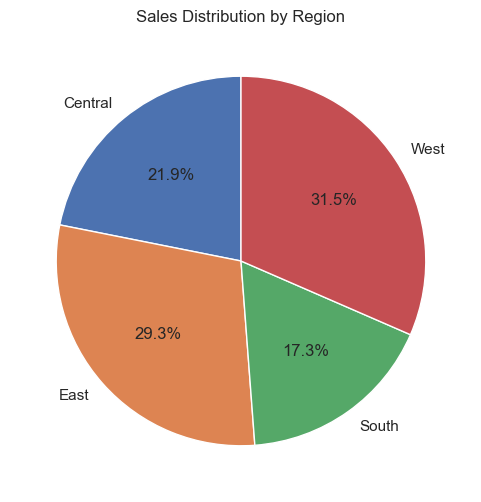

In [210]:
# Group by region and sum sales
sales_by_region = df.groupby('Region')['Sales'].sum()

# Plot pie chart 
plt.figure(figsize=(6,6))
plt.pie(sales_by_region.values, labels=sales_by_region.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Region') 
plt.show()

## Explanation
- Pie chart shows the West region has the highest sales, making up 31.5% of the total.
- The East region also performs well with 29.3%.
- However, the South region has the lowest sales at 17.3%.
- Central region also shows weak performance with 21.9%.

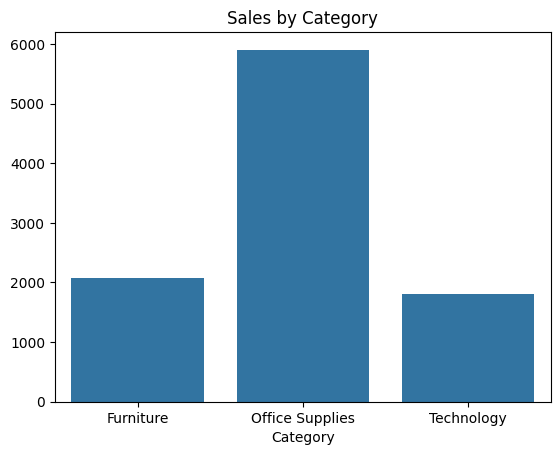

In [182]:
sales_by_region = df.groupby('Category')['Sales'].sum()
sns.barplot(x=df.Category.value_counts().index,y=df.Category.value_counts().values)
plt.title('Sales by Category')
plt.show()

## Explanation
- Office Supplies has the highest sales overall.
- Furniture and Technology have almost similar sales, but both are lower than Office Supplies.



## Regional Sales by Segment

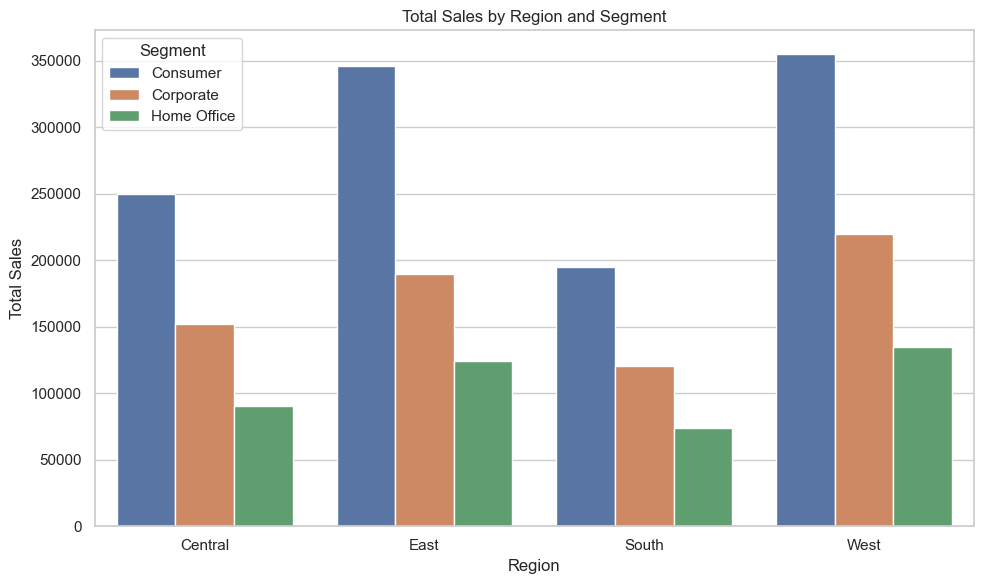

In [211]:
# 1. Group data and sum sales
grouped_data = df.groupby(['Region', 'Segment'])['Sales'].sum().reset_index()

# 2. Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Region', y='Sales', hue='Segment')
plt.title('Total Sales by Region and Segment')
plt.ylabel('Total Sales')
plt.xlabel('Region')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

## Total Orders vs Average Sales by Segment

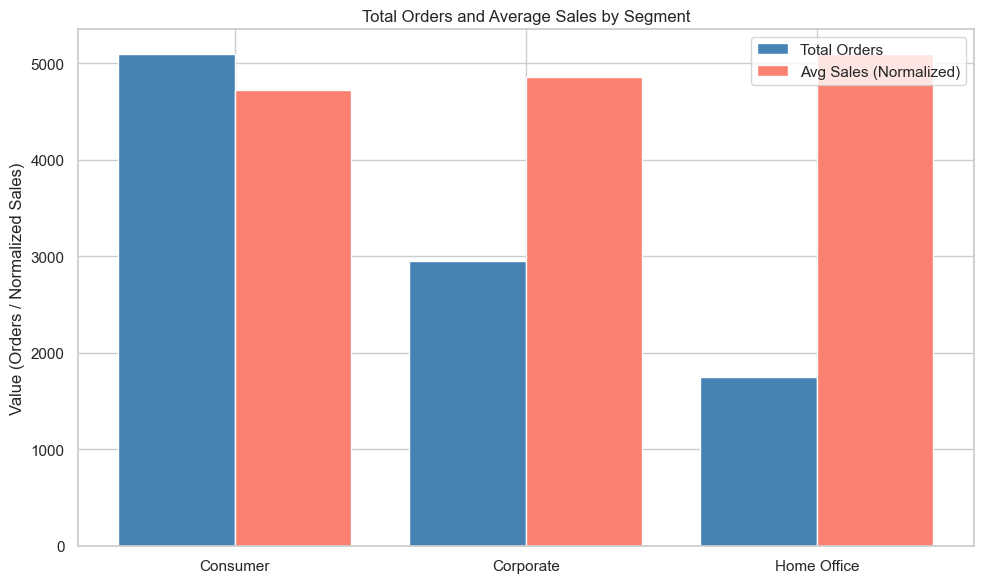

       Segment  Total Orders  Average Sales  Normalized Avg Sales
0     Consumer          5096         225.02               4722.83
1    Corporate          2948         231.42               4857.03
2  Home Office          1745         242.80               5096.00


In [218]:
# Total orders per segment
order_counts = df.groupby('Segment').size().reset_index(name='Total Orders')
# Average sales per segment
avg_sales = df.groupby('Segment')['Sales'].mean().reset_index(name='Average Sales')
summary = pd.merge(order_counts, avg_sales, on='Segment')

# Normalize average sales for comparison (e.g., scale to order count max)
summary['Normalized Avg Sales'] = summary['Average Sales'] / summary['Average Sales'].max() * summary['Total Orders'].max()

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(summary))
bar_width = 0.4
ax.bar([i - bar_width/2 for i in x], summary['Total Orders'], width=bar_width, label='Total Orders', color='steelblue')
ax.bar([i + bar_width/2 for i in x], summary['Normalized Avg Sales'], width=bar_width, label='Avg Sales (Normalized)', color='salmon')
ax.set_xticks(x)
ax.set_xticklabels(summary['Segment'])
ax.set_title('Total Orders and Average Sales by Segment')
ax.set_ylabel('Value (Orders / Normalized Sales)')
ax.legend()
plt.tight_layout()
plt.show()


summary['Average Sales'] = summary['Average Sales'].round(2)
summary['Normalized Avg Sales'] = summary['Normalized Avg Sales'].round(2)
print(summary)

## Findings
* From the **Sales-by-region-and-segment** bar plot, we find that central & south regions are not targeting consumers (individuals) unlike west and south regions, which are stronger in this group
* Since **Sales is strongly influenced by individual customers.** under this segement central & south regions are lagging.
* South and Central regions should be considered **Home Office** segment a small increase in order volume from Home Office customers could lead to significant    sales growth.
* These customers tend to purchase higher-ticket items (**e.g., technology, office furniture**), making them high-value despite low frequency.
---
## Suggetions
1. **Prioritize Consumer Outreach**
- Design targeted promotions and marketing campaigns specifically for **individual customers**
- Promote popular products and local deals through social media and emails that match what customers in each region want.
  
2. **Introduce Consumer‑Friendly Offers**
-  Offer limited‑time coupons, free shipping to encourage higher order frequency among individual buyers.
-  Create ready-made bundles of products that are useful for people working from home.(e.g. Wireless Mouse,Mouse Pad,USB Hub)

## Region Wise Shipping Duration

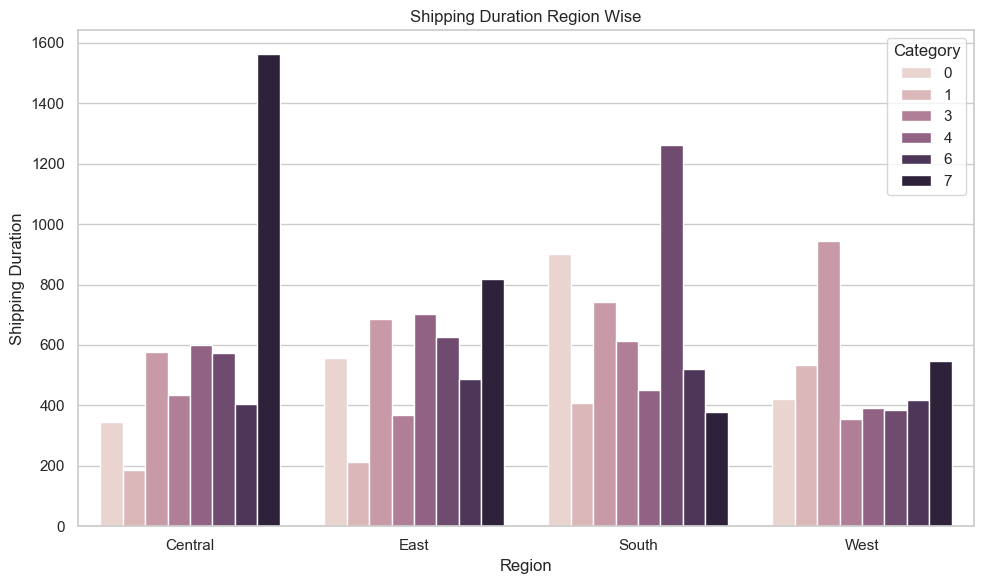

In [219]:
# 1. Group data and sum sales
grouped_data = df.groupby(['Region', 'Shipping Duration'])['Sales'].std().reset_index()

# 2. Plot bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Region', y='Sales', hue='Shipping Duration')
plt.title('Shipping Duration Region Wise')
plt.ylabel('Shipping Duration')
plt.xlabel('Region')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

## Findings
- Central and South regions also have logistics problems as we can observe in barplot, in central most of the shipments deliverd in 7 days while in west it takes more than 4 days to delivered orders.
- These longer shipping durations may lead to lower customer satisfaction, which can reduced sales performance in those regions.
---
## Suggetions
- Review current shipping providers in Central and South regions, Partner with Faster Shipping Carriers.
- Establish a nearby distribution hub closer to the Central and South regions to reduce average delivery time.

## Tracking Monthly and Seasonal Trends in Segment Sales

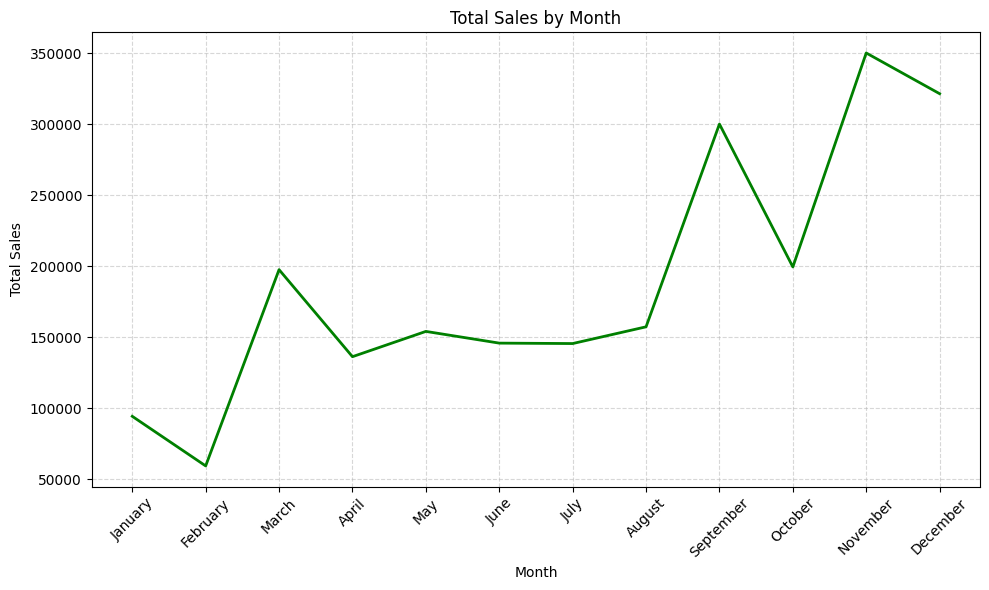

In [17]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract month name and number
df['Month'] = df['Order Date'].dt.month_name()
df['Month_Num'] = df['Order Date'].dt.month

# Group by month and sum sales
monthly_sales = df.groupby(['Month_Num', 'Month'])['Sales'].sum().reset_index()

# Sort by Month number to keep calendar order
monthly_sales = monthly_sales.sort_values('Month_Num')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], color='green', linewidth=2)

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Findings
- Highest Sales: November and December

- Secondary Peak: March

- Lowest Sales: Often April–August.

- **A sharp and unexpected sales dip in October signals a potential risk period.**

## Suggestions
- March, November, and December are naturally high-performing months.
  - South and Central regions should create targeted strategies and offer special promotions to boost sales during these peak months.
- April to August tend to show slower sales activity.
  - Introduce mid-year discounts, bundle offers, or seasonal campaigns to boost demand during these months.

## Sales Patterns by Segment: Monthly and Seasonal Trends

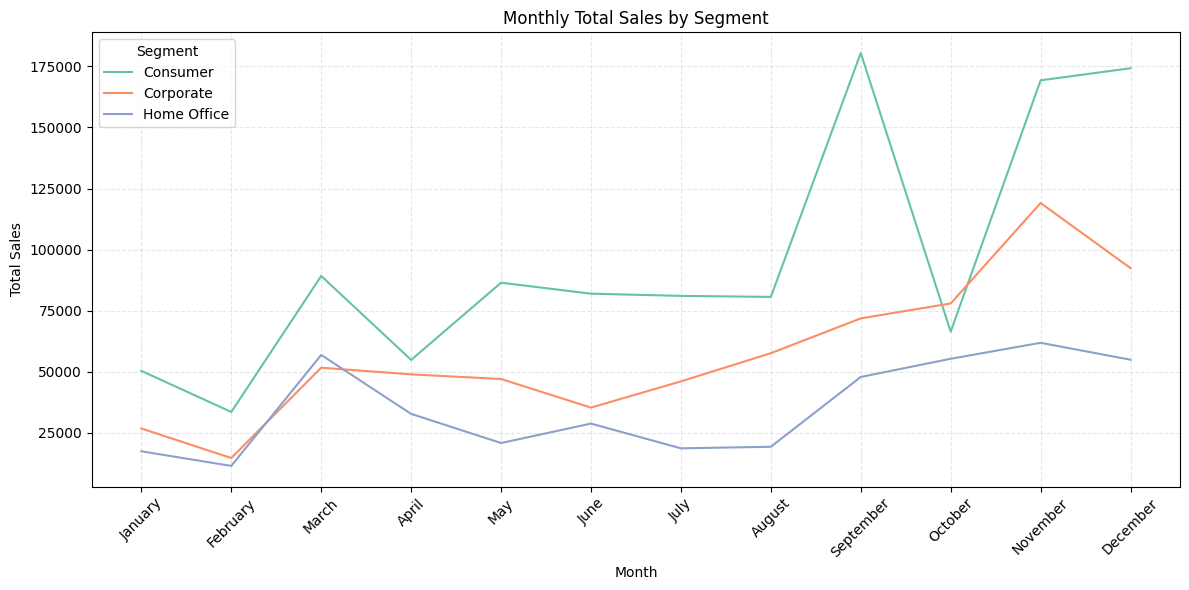

In [21]:
# Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract Month and Month Number
df['Month'] = df['Order Date'].dt.month_name()
df['Month_Num'] = df['Order Date'].dt.month

# Group by Month and Segment
monthly_sales = df.groupby(['Month_Num', 'Month', 'Segment'])['Sales'].sum().reset_index()

# Sort by calendar order
monthly_sales = monthly_sales.sort_values('Month_Num')

# Pivot for plotting (optional, or plot directly)
# monthly_sales_pivot = monthly_sales.pivot(index='Month', columns='Segment', values='Sales')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Segment', palette='Set2')

# Add formatting
plt.title('Monthly Total Sales by Segment')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


## Findings
- October's sales dip is mainly because the Consumer segment, which usually buys the most, made fewer purchases during this month.
- Home Office segment shows its highest sales in March, indicating strong business-related purchasing during this period.

## Suggestions
- Introduce targeted pre-festive promotions or limited-time bundles for the Consumer segment in early October to boost sales.
- Use email or social media campaigns to re-engage casual buyers before peak months begin.
- Launch March-focused campaigns targeting Home Office customers
- This will help South and Central regions reach active buyers and increase sales during this strong sales period.

---
### **Conclusion**

### 📊 Sales Segment Comparison Table

| Feature                    |Consumer              |Corporate             |Home Office           |
|----------------------------|----------------------|------------------------|------------------------|
| **Total Orders**           | Highest (5,100)      | Moderate (2,950)      | Lowest (1,745)        |
| **Average Sales per Order**| Lowest (225)         | Moderate (231)       | Highest (243)        |
| **Normalized Avg Sales**   | Medium (4,723)       | Medium-High (4,857)   | Highest (5,096)        |
| **Sales Pattern**          | **High volume, low margin** | Balanced           | **Low volume, high value** |
| **Business Insight**       | **Popular but less premium** | Steady performers   | **Profitable niche**       |
---

### 📦 Shipping Duration Comparison Table

| Feature                  | Same Day          | First Class        | Second Class       | Standard Class      |
|--------------------------|-------------------|---------------------|---------------------|----------------------|
| **Average Delivery Time**| Fastest           | Fast                | Moderate            | Slowest              |
| **Order Count**          | Lowest            | Low                 | Medium              | Highest              |
| **Avg Sales per Order**  | Highest           | High                | Medium              | Lowest               |
| **Insight**              | Fast but low volume | Good value segment | Reliable mid-choice | Volume driver        |
---

### 📆 Sales Trends by Month

|  **Period**         |  **Sales Behavior**     |  **Suggested Strategy**                                                                         |
|------------------------|---------------------------|--------------------------------------------------------------------------------------------|
| **March, November–December**|  Highest Sales      | Maximize **holiday promotions**, ensure **stock & shipping readiness**.                     |
| **October**            | Unexpected Dip          | Tease upcoming holiday offers; use **pre-festive advertisment** to boost early engagement.   |
|**April–August**        | Lowest Sales            | Introduce **mid-year discounts**, **combo deals**, or **back-to-school** bundles.            |


---
## Final Verdict for Sales Improvement:
- For **Consumer segment**, maintain volume but increase value via product bundles and limited-time offers to increase sales margin.
- Give special attention to **Home Office** customers, even a small increase in their order volume can drive significant revenue due to their
  high per-order sales.
- Use **First Class/Same Day** shipping incentives to target high-spending segments (like Home Office).
- Offer **free faster shipping** (like First Class) on orders above a certain amount — this will encourage customers who usually spend less to buy        more, so they can get the free fast delivery.
- Check how well current delivery services are working in the Central and South regions. If needed, team up with faster and more reliable shipping        companies to improve delivery speed.
- **Slow Months (April–August, October)** Run mid-year promotions, flash discounts, or loyalty point boosters to engage the Consumer segment and
  counteract the natural drop in demand.